In [36]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Import file
df = pd.read_csv(r'/Users/superlinh/Downloads/movies.csv')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# DATA CLEANING

In [37]:
#Check NA data
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [38]:
#Remove NA data
df = df.dropna(subset = ['rating','released','score','votes','writer','star','country','budget','gross','company','runtime'])

#Check NA data
df.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [39]:
#Check columns type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [40]:
#Change numeric data from float to int -> better presentation
df[['votes','gross','budget','runtime']] = df[['votes','gross','budget','runtime']].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [41]:
#Check the consistency between the years in column 'year' and 'released'

#Create a new column 'year_correct' extracted the year from column 'released'
df['year_correct'] = df['released'].str.extract('(\d\d\d\d)', expand = True)

#Change the type of column'year_correct' to int
df['year_correct'] = df['year_correct'].astype('int64')

#Filter the data with discrepancy

df[df['year_correct'] != df['year']]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109,1984
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97,1981
96,The Evil Dead,NC-17,Horror,1981,"April 15, 1983 (United States)",7.5,192000,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Stan & Ollie,PG,Biography,2018,"January 11, 2019 (United Kingdom)",7.2,34000,Jon S. Baird,Jeff Pope,Steve Coogan,United Kingdom,10000000,24420923,Entertainment One,98,2019
7432,Dragon Ball Super: Broly,PG,Animation,2018,"January 16, 2019 (United States)",7.8,24000,Tatsuya Nagamine,Akira Toriyama,Masako Nozawa,Japan,8500000,115757940,Toei Company,100,2019
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119,2020
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,2020


### --> 700 rows with inconsistent data

In [42]:
#Replace column 'year' with correct data
df['year'] = df['year_correct']

#Delete 'year_correct' column
del df['year_correct']

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [43]:
#Check duplicates
duplicates = df.duplicated(subset = ['name','year','country'])

df[duplicates]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


### --> There is no duplicate by 'name', 'year' and 'country'

# DATA CORRELATION

In [44]:
#Sort the database by gross (descending)
df.sort_values('gross', ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1994,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2001,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85


### --> Inital guess: high correlations between gross vs budget, gross vs company

In [45]:
#Create new dataframe 'df_numerized' to numerzie non-numerical data columns
df_numerized = df

for col in df_numerized.columns:
    if df_numerized[col].dtype == 'object':
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,1980,1304,8.4,927000,1795,2832,699,46,19000000,46998772,1426,146
1,3929,6,1,1980,1127,5.8,65000,1578,1158,214,47,4500000,58853106,452,104
2,3641,4,0,1980,1359,8.7,1200000,757,1818,1157,47,18000000,538375067,945,124
3,204,4,4,1980,1127,7.7,221000,889,1413,1474,47,3500000,83453539,1108,88
4,732,6,4,1980,1170,7.3,108000,719,351,271,47,6000000,39846344,1083,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000,16,2390,1812,47,90000000,426505244,452,124
7649,3556,4,0,2020,713,6.5,102000,852,2309,147,47,85000000,319715683,1108,99
7650,1153,4,1,2020,904,5.6,53000,1809,2827,1470,47,175000000,245487753,1397,101
7651,3978,4,1,2020,758,6.8,42000,294,2091,640,6,135000000,111105497,12,100


In [46]:
#Check the correlation matrix using Pearson method
df_numerized.corr(method = 'pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.022021,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.069147,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.022021,-0.069147,1.000000,-0.005989,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294
released,-0.006152,0.018083,0.022142,-0.005989,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975
score,0.014450,0.065983,0.035106,0.061923,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.203098,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.037371,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025495,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032687,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


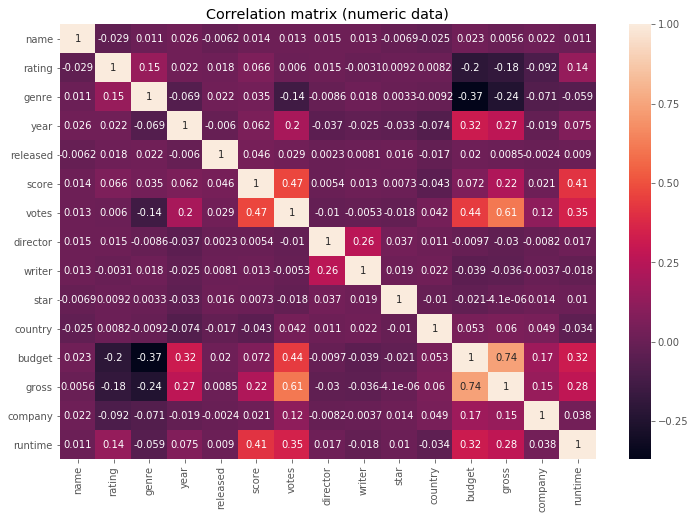

In [47]:
#Visualize the correlation_matrix

#Fix a matplotlib regression (first and last row cut in half of heatmap plot)
correlation_matrix = df_numerized.corr(method = 'pearson')
ax = sns.heatmap(correlation_matrix, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#Style the plot
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,8)

plt.title ('Correlation matrix (numeric data)')
plt.show()

### --> Result from the correlation matrix: high correlation between budget vs gross

# DATA VISUALISATION

Text(0.5, 1.0, 'BUDGET VS GROSS EARNINGS')

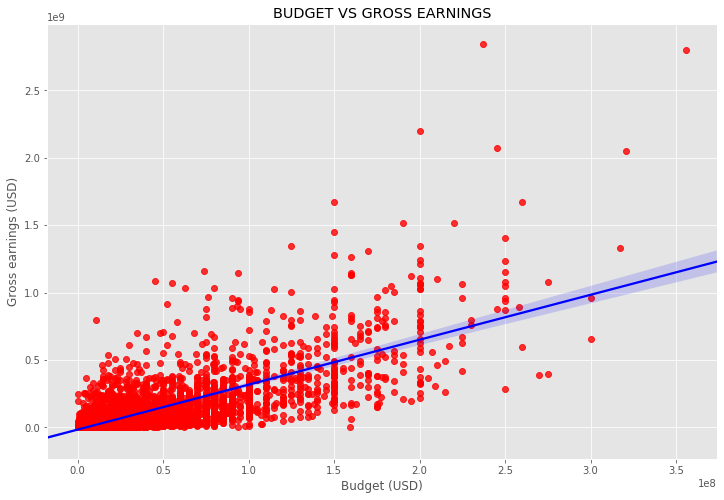

In [48]:
#Plot 'budget' vs 'gross'

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color':'red'}, line_kws = {'color': 'blue'})

plt.xlabel("Budget (USD)")
plt.ylabel("Gross earnings (USD)")
plt.title("BUDGET VS GROSS EARNINGS")